In [113]:
import pandas as pd
from pandas import merge

import numpy as np
from numpy import arange

from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs
init_notebook_mode(connected=True)
from plotly.tools import FigureFactory as FF
import plotly.plotly as py
import plotly.figure_factory as ff

import scipy
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram, linkage

import sklearn
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression


from matplotlib import pyplot as plt
from matplotlib import rc
%matplotlib auto

import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from plotly import __version__
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs
init_notebook_mode(connected=True)

from sklearn.externals.six import StringIO  
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import graphviz as gv

pd.options.display.max_columns = 50




Using matplotlib backend: Qt5Agg


In [114]:
cf = pd.read_csv('Country_facts.csv', index_col='Country')
cf.head()

,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,UEFA_Rank,Attendance,Home_Away_Contrast
Country,,,,,,,,,,,,,,,,,,,,,,,
Nigeria,SUB-SAHARAN AFRICA,131859731,923768,142.7,0.09,0.26,98.80,900.0,68.0,9.3,31.29,2.96,65.75,1.5,40.43,16.94,0.269,0.487,0.244,62,NaN,NaN,0.836696
Guatemala,LATIN AMER. & CARIB,12293545,108890,112.9,0.37,-1.67,35.93,4100.0,70.6,92.1,12.54,5.03,82.43,2.0,29.88,5.20,0.227,0.188,0.585,95,NaN,NaN,0.641629
Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,7.23,81.45,2.0,20.34,6.25,0.134,0.458,0.408,178,NaN,9368.0,0.586193
Ghana,SUB-SAHARAN AFRICA,22409572,239460,93.6,0.23,-0.64,51.43,2200.0,74.8,14.4,16.26,9.67,74.07,2.0,30.52,9.72,0.366,0.246,0.387,41,NaN,NaN,0.558027
Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,62.9,10.83,0.83,88.34,1.0,26.36,7.84,0.342,0.229,0.430,74,NaN,6911.0,0.486008


In [115]:

cdemog = cf[['Region', 'Population', 'Area', 'PopDensity', 'Coastline',
       'Net migration', 'Infant_mortality', 'GDP', 'Literacy', 'Phones',
       'Arable', 'Crops', 'Other', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'FIFA_Rank', 'UEFA_Rank',
       'Attendance', 'Home_Away_Contrast']] #Subsetting the data
cor = cdemog.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map


In [116]:
census = pd.read_csv("ACS_16_5YR_S1903.csv", encoding="latin-1", skiprows=1)
#census.head()

In [117]:
sl = pd.read_csv('SoccerLeagues.csv')
sl.head()

,Sport,Country,League,Year,Season,Team,Games,HomeWins,HomeDraw,HomeLoss,HomeRatio,AwayWins,AwayDraw,AwayLoss,AwayGoalsDiff,Unnamed: 15
0,Football,Algeria,Algeria-Ligue-1,2010,-,MC Oran,34,10,5,2,11,0,6,11,-20,NaN
1,Football,Algeria,Algeria-Ligue-1,2010,-,NA Hussein Dey,34,3,5,9,-8,0,5,12,-19,NaN
2,Football,Algeria,Algeria-Ligue-1,2011,-,MC El Eulma,29,9,3,2,13,0,6,9,-19,NaN
3,Football,Algeria,Algeria-Ligue-1,2011,-,Annaba,29,10,5,0,14,0,1,13,-23,NaN
4,Football,Algeria,Algeria-Ligue-1,2012,-,Khroub,30,7,5,3,0,0,5,10,-23,NaN


In [118]:
nba = pd.read_csv('NBA.csv', encoding="latin-1", sep=",")
nba.head()

,Year,Team,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT
0,1968,Atlanta Hawks,48,34,28,12,18,21,0.700000,0.461538,0.585366
1,1969,Atlanta Hawks,48,34,25,13,18,16,0.657895,0.529412,0.585366
2,1970,Atlanta Hawks,36,46,21,20,14,26,0.512195,0.350000,0.439024
3,1971,Atlanta Hawks,36,46,22,19,13,26,0.536585,0.333333,0.439024
4,1972,Atlanta Hawks,46,36,28,13,17,23,0.682927,0.425000,0.560976


In [119]:
nbacor = nba[['Wins', 'Loss', 'Home Wins', 'Home Loss',
       'Away Wins', 'Away Loss', 'HomePCT', 'AwayPCT', 'TotalPCT']] #Subsetting the data
cor = nbacor.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, center =0, square = True, annot=True) #Plot the correlation as heat map


In [120]:
arr = {"Boston", "New York", "Philadelphia", "Chicago", "Cleveland", "Detroit", "Indianapolis", "Milwaukee", "Atlanta", "Charlotte", "Miami", "Orlando", "Washington", "Denver", "Minneapolis", "Oklahoma", "Portland", "Salt Lake", "Oakland", "Los Angeles", "Phoenix", "Sacramento", "Dallas", "Houston", "Memphis", "New Orleans", "San Antonio"}
nbacensus = census[["Geography", "Total; Estimate; Households", "Median income (dollars); Estimate; Households"]]
nbacensus.head()
metro = {"Boston-Cambridge-Newton, MA-NH Metro Area", "New York-Newark-Jersey City, NY-NJ-PA Metro Area", "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Metro Area", 
         "Chicago-Naperville-Elgin, IL-IN-WI Metro Area",  "Cleveland-Elyria, OH Metro Area", "Detroit-Warren-Dearborn, MI Metro Area",
         "Indianapolis-Carmel-Anderson, IN Metro Area", "Milwaukee-Waukesha-West Allis, WI Metro Area", "Atlanta-Sandy Springs-Roswell, GA Metro Area", 
         "Charlotte-Concord-Gastonia, NC-SC Metro Area",  "Miami-Fort Lauderdale-West Palm Beach, FL Metro Area", "Orlando-Kissimmee-Sanford, FL Metro Area", 
         "Washington-Arlington-Alexandria, DC-VA-MD-WV Metro Area", "Denver-Aurora-Lakewood, CO Metro Area", "Minneapolis-St. Paul-Bloomington, MN-WI Metro Area", 
         "Oklahoma City, OK Metro Area", "Portland-Vancouver-Hillsboro, OR-WA Metro Area", "Salt Lake City, UT Metro Area", "San Francisco-Oakland-Hayward, CA Metro Area", 
         "Los Angeles-Long Beach-Anaheim, CA Metro Area", "Phoenix-Mesa-Scottsdale, AZ Metro Area", "Sacramento--Roseville--Arden-Arcade, CA Metro Area", 
         "Dallas-Fort Worth-Arlington, TX Metro Area", "Houston-The Woodlands-Sugar Land, TX Metro Area", "Memphis, TN-MS-AR Metro Area", 
         "New Orleans-Metairie, LA Metro Area", "San Antonio-New Braunfels, TX Metro Area"}

nbametros = nbacensus[nbacensus.Geography.isin(metro)]
nbametros['Metro'], nbametros['StateAbb.'] = nbametros['Geography'].str.split(',', 1).str
nbametros['StateAbb.'] = nbametros['StateAbb.'].str.replace('Metro Area','')
nbametros = nbametros[['Metro', 'StateAbb.', 'Median income (dollars); Estimate; Households']]
nbametros.head()

,Metro,StateAbb.,Median income (dollars); Estimate; Households
19,Atlanta-Sandy Springs-Roswell,GA,59183
44,Boston-Cambridge-Newton,MA-NH,77809
66,Charlotte-Concord-Gastonia,NC-SC,55191
70,Chicago-Naperville-Elgin,IL-IN-WI,63327
75,Cleveland-Elyria,OH,51001


In [121]:
nbacluster = nba.drop('Year', 1)
cols = nbacluster.columns[1:]
cluster = KMeans(n_clusters=4)
nbacluster["cluster"] = cluster.fit_predict(nbacluster[nbacluster.columns[2:]])

In [122]:
pca = PCA(n_components=2)
nbacluster["x"] = pca.fit_transform(nbacluster[cols])[:, 0]
nbacluster["y"] = pca.fit_transform(nbacluster[cols])[:, 1]
nbacluster = nbacluster.reset_index()
team_clusters = nbacluster[["Team", "cluster", "x", "y"]]
team_clusters.head()

,Team,cluster,x,y
0,Atlanta Hawks,0,11.835234,-0.777508
1,Atlanta Hawks,0,11.982275,3.236195
2,Atlanta Hawks,3,-9.004553,-0.735961
3,Atlanta Hawks,3,-8.692195,-0.901725
4,Atlanta Hawks,0,8.402800,-1.876648


In [123]:
final = merge(nbacluster, team_clusters)
final.head()

,index,Team,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,cluster,x,y
0,0,Atlanta Hawks,48,34,28,12,18,21,0.700000,0.461538,0.585366,0,11.835234,-0.777508
1,1,Atlanta Hawks,48,34,25,13,18,16,0.657895,0.529412,0.585366,0,11.982275,3.236195
2,2,Atlanta Hawks,36,46,21,20,14,26,0.512195,0.350000,0.439024,3,-9.004553,-0.735961
3,3,Atlanta Hawks,36,46,22,19,13,26,0.536585,0.333333,0.439024,3,-8.692195,-0.901725
4,4,Atlanta Hawks,46,36,28,13,17,23,0.682927,0.425000,0.560976,0,8.402800,-1.876648


In [124]:
trace0 = go.Scatter(x = team_clusters[team_clusters.cluster ==0]["x"],
                    y = team_clusters[team_clusters.cluster ==0]["y"],
                    name = "Cluster 1", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgba(15, 152, 152, 0.5)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   ) 
trace1 = go.Scatter(x = team_clusters[team_clusters.cluster ==1]["x"],
                    y = team_clusters[team_clusters.cluster ==1]["y"],
                    name = "Cluster 2", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgba(180, 18, 180, 0.5)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   )
trace2 = go.Scatter(x = team_clusters[team_clusters.cluster ==2]["x"],
                    y = team_clusters[team_clusters.cluster ==2]["y"],
                    name = "Cluster 3", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgba(132, 132, 132, 0.5)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   )
trace3 = go.Scatter(x = team_clusters[team_clusters.cluster ==3]["x"],
                    y = team_clusters[team_clusters.cluster ==3]["y"],
                    name = "Cluster 4", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgba(100, 15, 100, 0.5)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   )

In [125]:
data = [trace0, trace1, trace2, trace3]
iplot(data)

In [126]:
final["cluster"].value_counts()

0    457
3    333
2    318
1    202
Name: cluster, dtype: int64

In [127]:
final[final.cluster ==0]["Team"].head()

0     Atlanta Hawks
1     Atlanta Hawks
4     Atlanta Hawks
9     Atlanta Hawks
10    Atlanta Hawks
Name: Team, dtype: object

In [128]:
final[final.cluster ==0].describe().loc[['mean']]

,index,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,cluster,x,y
mean,617.332604,43.551422,36.669584,26.730853,12.389497,15.770241,23.380744,0.68237,0.400149,0.541406,0.0,5.945675,-0.328611


In [129]:
final[final.cluster ==1]["Team"].head()

34        Atlanta Hawks
37        Atlanta Hawks
38        Atlanta Hawks
39        Atlanta Hawks
47    Baltimore Bullets
Name: Team, dtype: object

In [130]:
final[final.cluster ==1].describe().loc[['mean']]

,index,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,cluster,x,y
mean,625.455446,21.59901,60.064356,14.237624,25.886139,6.90099,33.00495,0.353738,0.171469,0.264354,1.0,-33.148186,-0.830806


In [131]:
final[final.cluster ==2]["Team"].head()

21    Atlanta Hawks
23    Atlanta Hawks
28    Atlanta Hawks
30    Atlanta Hawks
32    Atlanta Hawks
Name: Team, dtype: object

In [132]:
final[final.cluster ==2].describe().loc[['mean']]

,index,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,cluster,x,y
mean,617.166667,55.110063,24.58805,31.301887,7.562893,22.622642,16.575472,0.805197,0.574135,0.689823,2.0,26.197195,0.996882


In [133]:
final[final.cluster ==3]["Team"].head()

2    Atlanta Hawks
3    Atlanta Hawks
5    Atlanta Hawks
6    Atlanta Hawks
7    Atlanta Hawks
Name: Team, dtype: object

In [134]:
final[final.cluster ==3].describe().loc[['mean']]

,index,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,cluster,x,y
mean,585.705706,33.09009,47.786787,21.234234,17.852853,10.651652,28.261261,0.540924,0.27138,0.407929,3.0,-12.57262,-0.614144


In [135]:
X = nba[["HomePCT", "AwayPCT"]]
Y = nba['Home Wins']

In [136]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(814, 2)
(402, 2)
(814,)
(402,)


In [137]:
lm = LinearRegression()
lm.fit(X_train, Y_train)


lm.score(X,Y)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Wins: $Y_i$")
plt.ylabel("Predicted Wins: $\hat{Y}_i$")
plt.title("Wins vs Predicted wins: $Y_i$ vs $\hat{Y}_i$")

mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse) #Not great

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

8.416695698351639


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Home Wins   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 4.541e+04
Date:                Mon, 30 Apr 2018   Prob (F-statistic):               0.00
Time:                        14:08:53   Log-Likelihood:                -3028.1
No. Observations:                1216   AIC:                             6060.
Df Residuals:                    1214   BIC:                             6070.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HomePCT       37.1895      0.466     79.819      0.000      36.275      38.104
AwayPCT        3.0328      0.744      4.078      0.000       1.574       4.492
==============================================================================
Omnibus:                      594.903   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2540.559
Skew:                          -2.418   Prob(JB):                         0.00
Kurtosis:                       8.172   Cond. No.                         7.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
sl["HWPCT"] = abs((sl.iloc[:, 8]+sl.iloc[:, 9])/(sl.iloc[:, 6]))

In [154]:
def dtclasses (sl):
 
    if sl["HWPCT"] >= 0.5:
        return 0
    elif sl["HWPCT"] < 0.5:
        return 1
   
sl["Class"]=sl.apply(lambda sl: dtclasses(sl), axis=1)
sl.head()

,Sport,Country,League,Year,Season,Team,Games,HomeWins,HomeDraw,HomeLoss,HomeRatio,AwayWins,AwayDraw,AwayLoss,AwayGoalsDiff,Unnamed: 15,HWPCT,Class
0,Football,Algeria,Algeria-Ligue-1,2010,-,MC Oran,34,10,5,2,11,0,6,11,-20,NaN,0.205882,1
1,Football,Algeria,Algeria-Ligue-1,2010,-,NA Hussein Dey,34,3,5,9,-8,0,5,12,-19,NaN,0.411765,1
2,Football,Algeria,Algeria-Ligue-1,2011,-,MC El Eulma,29,9,3,2,13,0,6,9,-19,NaN,0.172414,1
3,Football,Algeria,Algeria-Ligue-1,2011,-,Annaba,29,10,5,0,14,0,1,13,-23,NaN,0.172414,1
4,Football,Algeria,Algeria-Ligue-1,2012,-,Khroub,30,7,5,3,0,0,5,10,-23,NaN,0.266667,1


In [155]:
sl["Class"].value_counts()

1    8200
0     165
Name: Class, dtype: int64

In [146]:
features = ['HomeWins']
X = sl[features]
y= sl["Class"]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
model = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9890057361376673

In [147]:
confusion_matrix(y_test, y_predict)

array([[  41,    5],
       [  18, 2028]], dtype=int64)

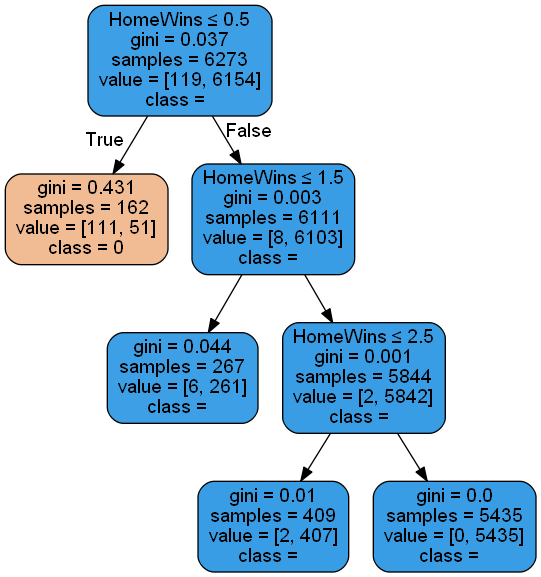

In [156]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=features, class_names= str(sl.Class), filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [150]:
graph.write_pdf("HWtree.pdf")

True

In [ ]:
miaheat = nba.loc[nba["Team"] == 'Miami Heat']
miaheat
Nhea = len(miaheat)
ind = np.arange(Nhea)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, miaheat.iloc[:,4], width)
p2 = plt.bar(ind, miaheat.iloc[:,5], width, bottom=miaheat.iloc[:,4])
p3 = plt.bar(ind, miaheat.iloc[:,6], width, bottom=miaheat.iloc[:,5]+miaheat.iloc[:,4])
p4 = plt.bar(ind, miaheat.iloc[:,7], width, bottom=miaheat.iloc[:,6]+miaheat.iloc[:,5]+miaheat.iloc[:,4])


plt.ylabel('')
plt.title('Miami Heat Performance')
plt.xticks(ind, miaheat['Year'])
plt.yticks(np.arange(0, 82, 2))

plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Home Wins', 'Home Loss', 'Away Wins', 'Away Loss'))

plt.show()

In [ ]:
NAll = len(sl)
ind = np.arange(NAll)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, sl.iloc[:,8], width, color="b")
p2 = plt.bar(ind, sl.iloc[:,9], width, bottom=sl.iloc[:,8], color="r")
p3 = plt.bar(ind, sl.iloc[:,10], width, bottom=sl.iloc[:,9]+sl.iloc[:,8], color="y")
p4 = plt.bar(ind, sl.iloc[:,11], width, bottom=sl.iloc[:,10]+sl.iloc[:,9]+sl.iloc[:,8], color="purple")
p5 = plt.bar(ind, sl.iloc[:,12], width, bottom=sl.iloc[:,11]+sl.iloc[:,10]+sl.iloc[:,9]+sl.iloc[:,8], color="orange")
p6 = plt.bar(ind, sl.iloc[:,13], width, bottom= sl.iloc[:,12]+sl.iloc[:,11]+sl.iloc[:,10]+sl.iloc[:,9]+sl.iloc[:,8], color="green")
p7 = plt.bar(ind, sl.iloc[:,11], width, bottom= sl.iloc[:,13]+sl.iloc[:,12]+sl.iloc[:,11]+sl.iloc[:,10]+sl.iloc[:,9]+sl.iloc[:,8], color="black")




plt.ylabel('')
plt.title('NBA Team Average Performance')
plt.xticks(ind, nba['Year'])
plt.yticks(np.arange(0, 82, 1))

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]), ('Home Wins', 'Home Loss', 'Away Wins', 'Away Loss'))

#plt.show()

In [ ]:
NAll = len(nba)
ind = np.arange(NAll)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, nba.iloc[:,4], width, color="b")
p2 = plt.bar(ind, nba.iloc[:,5], width, bottom=nba.iloc[:,4], color="r")
p3 = plt.bar(ind, nba.iloc[:,6], width, bottom=nba.iloc[:,5]+nba.iloc[:,4], color="y")
p4 = plt.bar(ind, nba.iloc[:,7], width, bottom=nba.iloc[:,6]+nba.iloc[:,5]+nba.iloc[:,4], color="black")


plt.ylabel('')
plt.title('NBA Team Average Performance')
plt.xticks(ind, nba['Year'])
plt.yticks(np.arange(0, 82, 1))

plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Home Wins', 'Home Loss', 'Away Wins', 'Away Loss'))

#plt.show()